<a href="https://colab.research.google.com/github/sampath-kothapalli/bike-sharing-data-analysis/blob/main/yulu_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# <font color='red'>**Yulu Bike-Sharing Data Analysis: EDA & Hypothesis Testing**</font>

---

In [1]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [2]:
# import zipfile library to extract the file downloaded from Kaggle
import zipfile

# import kaggle library to download the dataset from Kaggle
import kaggle

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## **Importing Data**

In [4]:
!kaggle datasets download sachinbagale/yulu-bike-sharing

Dataset URL: https://www.kaggle.com/datasets/sachinbagale/yulu-bike-sharing
License(s): unknown
yulu-bike-sharing.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
with zipfile.ZipFile('yulu-bike-sharing.zip','r') as file:
    file.extractall()

In [6]:
# reading data to DataFrame from csv file using read_csv file function
df = pd.read_csv('/content/bike_sharing.csv')

In [7]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## **Data Exploration**

**Column Profiling:**
- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday : whether day is a holiday or not
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
   1. Clear, Few clouds, partly cloudy
   2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +
     Scattered clouds
   4. Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

### **Number of Rows and Columns in the Dataset**

In [8]:
print("Number of Rows :", df.shape[0])
print("Number of Columns :", df.shape[1])

Number of Rows : 10886
Number of Columns : 12


### **Data Type and Info of the columns**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### **Duplicate and Missing Values**

In [10]:
df.duplicated().sum()  # checking for duplicated records

0

In [11]:
df.isna().sum()  #checking for nulls in any of the columns in the datset

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [12]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### **Column Data Type Conversion**

In [13]:
categorical_columns = ['season', 'holiday', 'workingday', 'weather']

df['datetime'] = pd.to_datetime(df['datetime'])

for col in categorical_columns:
  df[col] = df[col].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [15]:
df.season.unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [16]:
# create a disctionary to map exisiitng seasons with Their names
season_map = {1:"Spring",
              2:"Summer",
              3:"Fall",
              4:"Winter"
              }
# map them using the previously created disctionary
df['season'] = df['season'].map(season_map)

In [17]:
df['weather'] = df['weather'].map({1: 'Clear', 2:'Partly Cloudy', 3:'Rain', 4:'Heavy Rain'})

### Observations:

- There were 10K records with 12 different columns in the dataset.
- No duplicate records also no null values in any of the columns as well.
- There are few columns that needs to datatype changed
  - datetime --> `pd.datetime()`
  - season, holiday, workingday, weather --> Categorical Data Type

## **Exploration with Visualization**

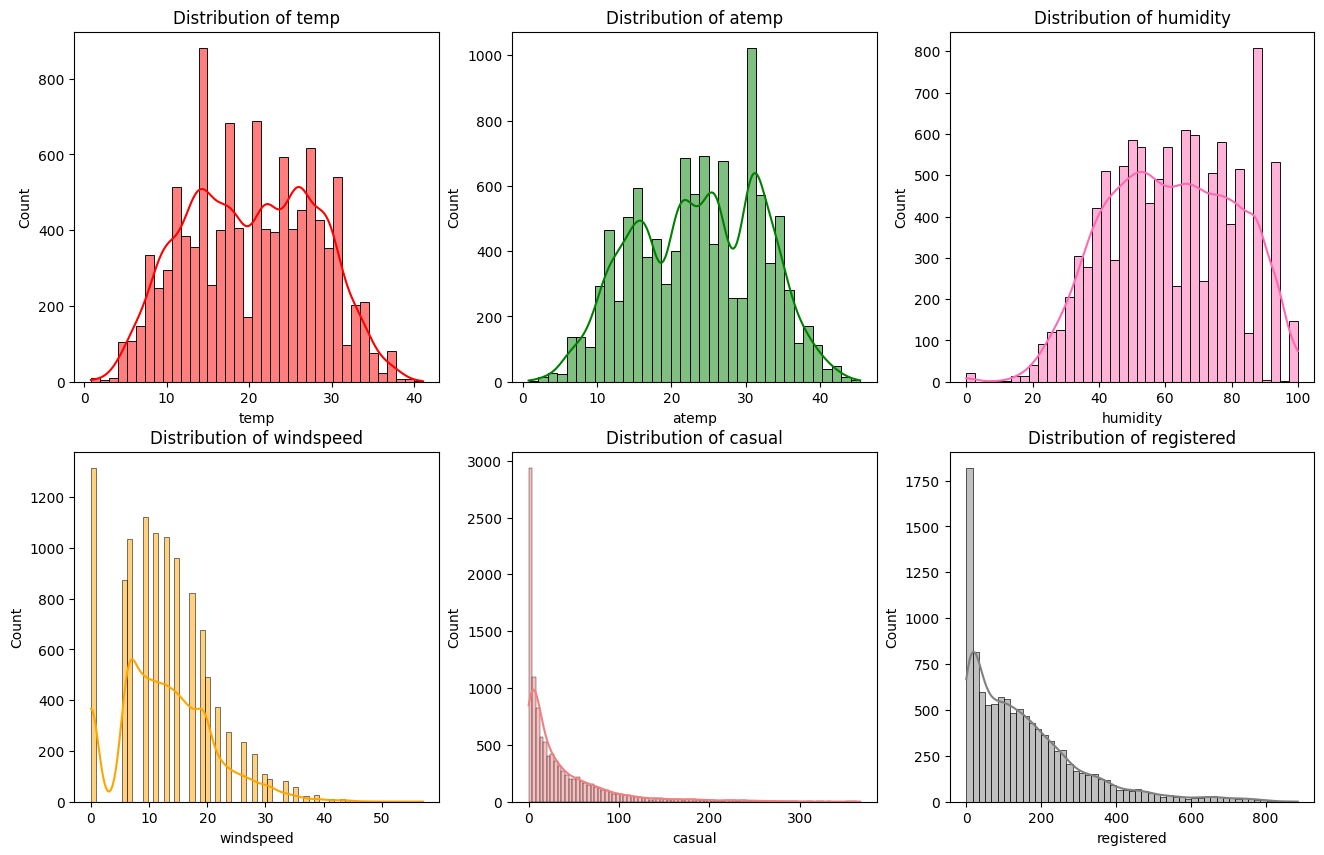

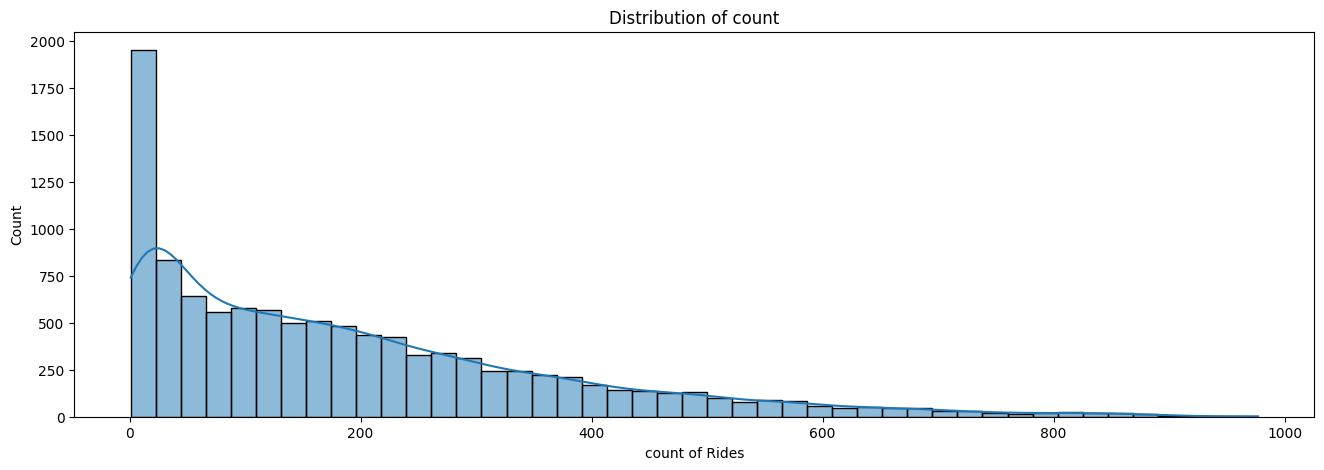

In [18]:
fig,axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16,10))
colors = ['red', 'green', 'hotpink', 'orange' ,'lightcoral','grey']
# continous variables storedd in a list to iterate over it for plotting
cont_col = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
k = 0

for i in range(2):
  for j in range(3):
    sns.histplot(data = df, x = cont_col[k], ax=axes[i,j], kde = True, color = colors[k])
    axes[i,j].set_title(f"Distribution of {cont_col[k]}")
    axes[i,j].set_xlabel(cont_col[k])
    axes[i,j].set_ylabel("Count")
    k += 1
plt.figure(figsize = (16,5))
sns.histplot(df[cont_col[-1]], kde=True)
plt.title(f"Distribution of {cont_col[-1]}")
plt.xlabel(f"{cont_col[-1]} of Rides")
plt.ylabel("Count")
plt.show()

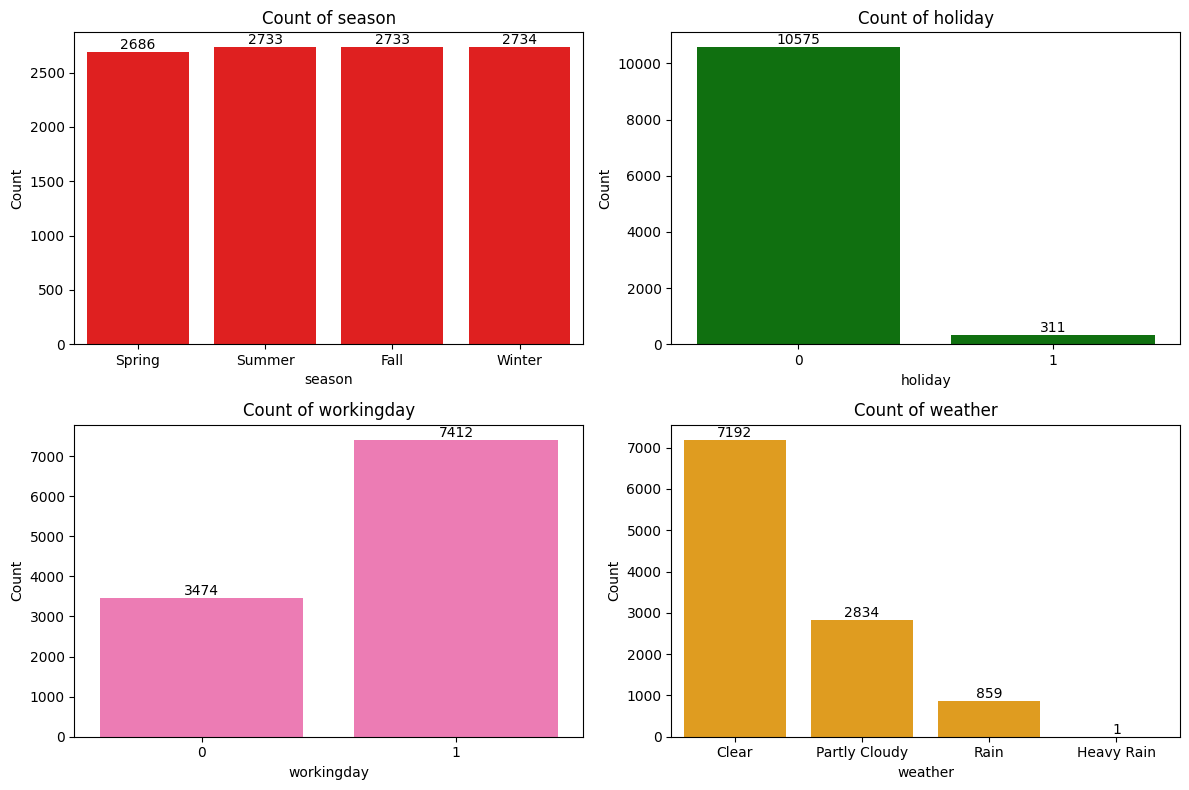

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()  # Flattening the 2D array for easy iteration

colors = ['red', 'green', 'hotpink', 'orange']
cat_cols = ['season', 'holiday', 'workingday', 'weather']

for ax, col, color in zip(axes, cat_cols, colors):
    sns.countplot(data=df, x=col, ax=ax, color=color)

    # Add bar labels
    for container in ax.containers:
        ax.bar_label(container)

    ax.set_title(f"Count of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

## **Outliers and Outliers Treatment**

### **Outliers:**

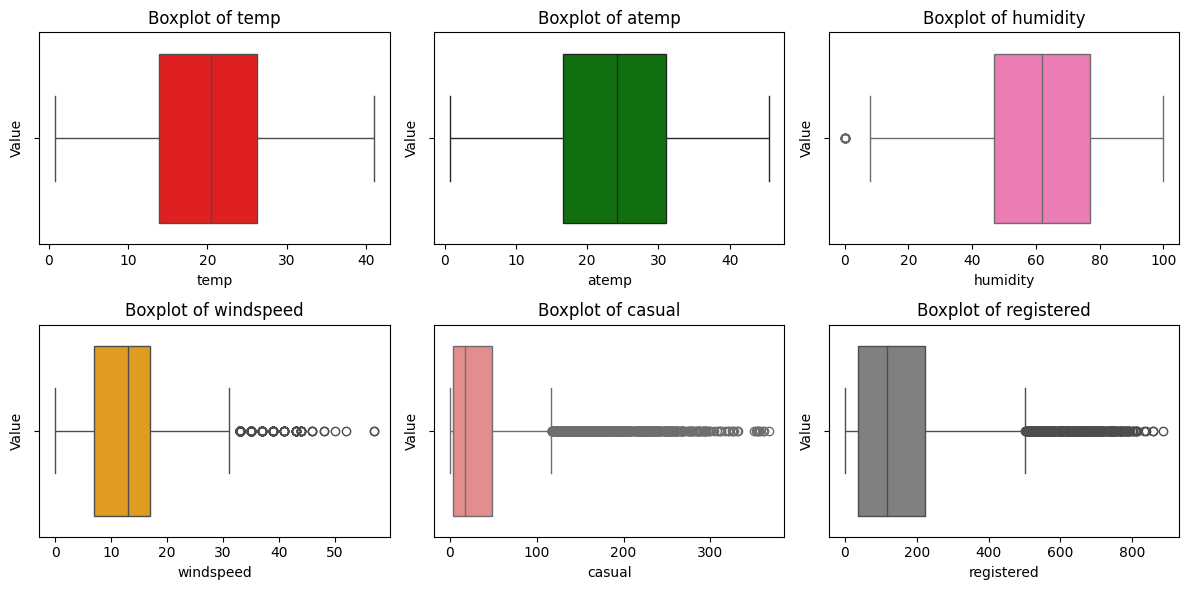

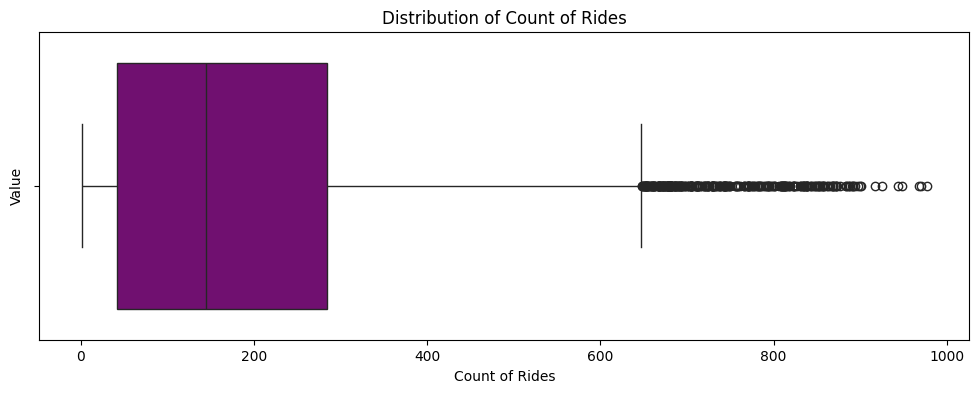

In [20]:
cont_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']
colors = ['red', 'green', 'hotpink', 'orange', 'lightcoral', 'grey']

# Create subplots for first 6 continuous variables
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
axes = axes.flatten()  # Flatten axes array for easy iteration

for ax, col, color in zip(axes, cont_cols, colors):
    sns.boxplot(data=df, x=col, ax=ax, color=color)
    ax.set_title(f"Boxplot of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Value")

plt.tight_layout()
plt.show()

# Separate plot for 'count' variable
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x='count', color='purple')
plt.title("Distribution of Count of Rides")
plt.xlabel("Count of Rides")
plt.ylabel("Value")
plt.show()

### Observatuons:

- There are no outliers in the temp, atemp columns
- There was few in humidity column, we can check the count if it was low we can ignoreelse treat
- We can observe the outliers in the remaining continuous variables

We can check how many are there using **IQR** based on that either we an remove them or **clip them**

### **Outlier Treatment:**

In [21]:
outlier_col = ['humidity','windspeed','casual', 'registered', 'count']
def calculate_iqr(df,col):
  q3 = df[col].quantile(0.75)
  q1 = df[col].quantile(0.25)
  iqr = q3-q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  return lower_bound,upper_bound,iqr

for col in outlier_col:
  lower_bound,upper_bound,iqr = calculate_iqr(df,col)
  df_outlier = df[(df[col] < (lower_bound)) | (df[col] > (upper_bound))]
  print(f'{col} - {df_outlier.shape[0]}, in percentage {round((df_outlier.shape[0]/df.shape[0])*100,2)}')

humidity - 22, in percentage 0.2
windspeed - 227, in percentage 2.09
casual - 749, in percentage 6.88
registered - 423, in percentage 3.89
count - 300, in percentage 2.76


In [22]:
for col in outlier_col:
    percentile_5 = np.percentile(df[col], 5)
    percentile_95 = np.percentile(df[col], 95)
    df[col] = np.round(np.clip(df[col], percentile_5, percentile_95),2)

In [23]:
for col in outlier_col:
  lower_bound,upper_bound,iqr = calculate_iqr(df,col)
  df_outlier = df[(df[col] < (lower_bound)) | (df[col] > (upper_bound))]
  print(f'{col} - {df_outlier.shape[0]}, in percentage {round((df_outlier.shape[0]/df.shape[0])*100,2)}')

humidity - 0, in percentage 0.0
windspeed - 0, in percentage 0.0
casual - 749, in percentage 6.88
registered - 0, in percentage 0.0
count - 0, in percentage 0.0


In [24]:
lower_bound,upper_bound,iqr = calculate_iqr(df,'casual')
df_outlier_casual = df[(df['casual'] < (lower_bound)) | (df['casual'] > (upper_bound))]
df_outlier_casual.shape

(749, 12)

In [25]:
df_outlier_casual['casual'].min()

117

Lets try clipping with a little lower percentile than 95 to clip the outliers

In [26]:
df['casual'] = np.round(np.clip(df['casual'], np.percentile(df['casual'], 5), np.percentile(df['casual'], 93)),2)

In [27]:
lower_bound,upper_bound,iqr = calculate_iqr(df,'casual')
df_outlier = df[(df['casual'] < (lower_bound)) | (df['casual'] > (upper_bound))]
print(f'casual - {df_outlier.shape[0]}, in percentage {round((df_outlier.shape[0]/df.shape[0])*100,2)}')

casual - 0, in percentage 0.0


### Observations:
- As there were still outlier in the `casual` column with clipping between 5 and 95 percentile.
- All the outliers has been treated by clipping the data between 5 and 95 percentilr for the column casual alone it was clipped between 5 and 93 percentile

## **Correlation between Variables**

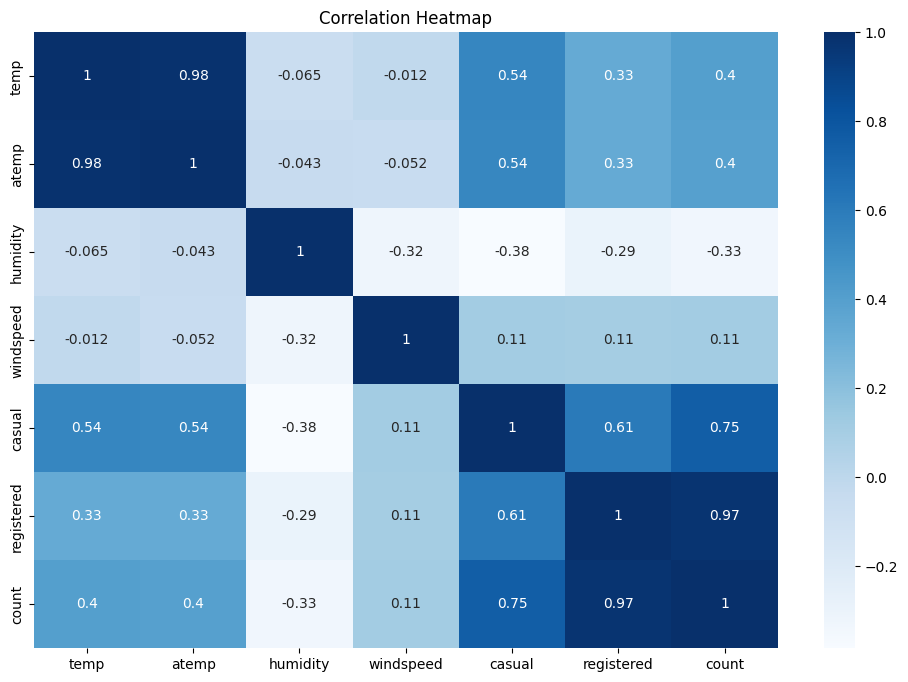

In [28]:
corr_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

### Observations:
1. `temp` and `atemp`
  - `temp` and `atemp` columns are very highly correlated with 0.98 correlation coefficient
  - These two columns correlation with other columns is similar as well.
  - we can remove one of as these columns as it will be redundant to keep both because both provide same information

2. Correlation with `count`
- `registered` has the higest correaltion with `count` (0.97) indicates registered users contribute significantiy to the overall count
- `casual` also has the somehat high correlation (0.75) also a significant contributor
- `temp` has moderate correlation (0.4)
- `humidity` has negative correlation which indicates higher humidity can reduce the total count


In [29]:
df.drop('atemp', axis =1, inplace = True)
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,81,0.0,3,13,16.0
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,80,0.0,8,32,40.0
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,80,0.0,5,27,32.0
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,75,0.0,3,10,13.0
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,75,0.0,0,4,5.0


## Functions for Normality and Levenes Test

In [30]:
from statsmodels.api import qqplot
from scipy.stats import shapiro

def qq_shapiro_test(df, groupby, column='count', shapiro_sample_size=2000):
    """
    Generates QQ plots and performs Shapiro-Wilk normality test for each unique category in a DataFrame.

    Parameters:
    df (pd.DataFrame): Input DataFrame.
    column (str): Column for QQ plot and normality test (default: 'count').
    groupby (str): Categorical column to group by (default: 'workingday').
    shapiro_sample_size (int): Sample size for Shapiro test (default: 2000).

    Returns:
    None
    """
    unique_groups = df[groupby].unique()
    group_data_list = [(group, df[df[groupby] == group][column]) for group in unique_groups]

    # removing groups with less than 3 records
    valid_groups = [(group, data) for group, data in group_data_list if len(data) >= 3]

    if not valid_groups:
        print("❌ No groups with sufficient data (≥3 samples) for normality testing.")
        return

    num_groups = len(valid_groups)
    cols = 4
    rows = -(-num_groups // cols)  # equivalent to math.ceil(num_groups / cols)

    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()  #[:num_groups]  # removes any additioanl subplot spaces

    print("📊 **Shapiro-Wilk Normality Test Results**\n")

    for ax, (group, data) in zip(axes, valid_groups):
        actual_sample_size = min(shapiro_sample_size, len(data))
        sample_data = data.sample(actual_sample_size, random_state=42)

        # Perform Shapiro-Wilk test
        stat, p_value = shapiro(sample_data)
        print(f"🔹 **{group}** → P-value: {p_value:.5f}")

        if p_value < 0.05:
            print(f"   ❌ **Reject H₀**: Data is NOT normally distributed.")
        else:
            print(f"   ✅ **Fail to Reject H₀**: Data appears Normally distributed.")
        print('-' * 50)

        # Generate QQ Plot
        qqplot(data, ax=ax, line='s')
        ax.set_title(f"QQ Plot: {groupby.capitalize()} - {group}")

    for ax in axes[num_groups:]:
          fig.delaxes(ax)

    plt.tight_layout()
    plt.show()


In [31]:
from scipy.stats import levene

def levene_test(df,  groupby, column = 'count'):
    """
    Performs Levene’s test for equal variances across multiple groups.

    Parameters:
    df (pd.DataFrame): Input DataFrame.
    column (str): Numeric column to compare variances.
    groupby (str): Categorical column to group by.

    Returns:
    None (prints formatted test results).
    """
    unique_groups = df[groupby].unique()
    group_data = {group: df[df[groupby] == group][column].values for group in unique_groups}

    # Ensure at least two groups for the test
    if len(group_data) < 2:
        print(f"⚠️ Skipping {groupby}: Requires at least 2 groups, but only {len(group_data)} found.")
        return

    # Perform Levene’s test
    stat, p_value = levene(*group_data.values())

    # Display results
    print(f"\nLevene’s Test: {groupby} vs. {column}")
    print(f"🔹 P-value: {p_value:.5f}")

    if p_value < 0.05:
        print("   ❌ **Reject H₀**: Variances are NOT equal.")
    else:
        print("   ✅ **Fail to Reject H₀**: Variances are equal.")

    print('-' * 50)

    return group_data.values()

## **No. of Bike Rides vs Weekdays/Weekends**

In [32]:
df['workingday'].value_counts()

,count
workingday,
1,7412
0,3474


In [33]:
weekday = df[df['workingday'] == 1]['count']
weekend = df[df['workingday'] == 0]['count']

### Formulating Null(Ho) and Alternate (Ha) Hypothesis

**Null Hypothesis (Ho)** - There is no difference between the count of bike rides on weekdays and weekends

**Alternate Hypothesis (Ha)** - There is significant difference between the count of bike rides on weekdays and weekends

### Selecting the Test

- We can use **T-Test for Independence** here as we are comparing a Numerical vs Categorical(2 categories)

### Validating Assumptions

#### Normality Check (QQPlot and Shapiro Wilk Test)

📊 **Shapiro-Wilk Normality Test Results**

🔹 **0** → P-value: 0.00000
   ❌ **Reject H₀**: Data is NOT normally distributed.
--------------------------------------------------
🔹 **1** → P-value: 0.00000
   ❌ **Reject H₀**: Data is NOT normally distributed.
--------------------------------------------------


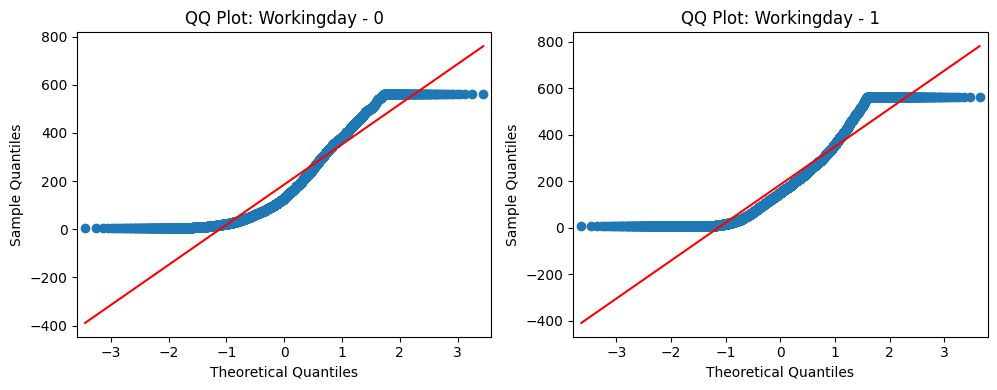

In [34]:
qq_shapiro_test(df, "workingday")

#### Levene's Test for Equal Variance

In [35]:
working_data = levene_test(df, "workingday")


Levene’s Test: workingday vs. count
🔹 P-value: 0.02140
   ❌ **Reject H₀**: Variances are NOT equal.
--------------------------------------------------


### Calculate the Test Statistics and p-value

Since both the normality test and Levene’s test for equal variance have failed, parametric test like the t-test is no longer valid. Instead, I have performed the **`Mann-Whitney U`** test for two-group comparisons.

 However, for completeness, both parametric and non-parametric tests have been performed below—compare the results accordingly.

In [36]:
from scipy.stats import ttest_ind,mannwhitneyu

u_stat, p_value = mannwhitneyu(weekday, weekend, alternative='two-sided')
print(f"Mann-Whitney - U-Stat: {u_stat}, P-Value ={p_value}")

if p_value <= 0.05:
  print(" Reject the Null Hypothesis (Ho), there is signififcant difference between the count of bike rides on weekdays and weekends")
else:
  print("Failed to Reject the Null Hypothesis (Ho), there is no significant difference between the count of bike rides on weekdays and weekends  ")

Mann-Whitney - U-Stat: 12857582.0, P-Value =0.9111010056076032
Failed to Reject the Null Hypothesis (Ho), there is no significant difference between the count of bike rides on weekdays and weekends  


In [37]:
# no need to mention alternative as we are doing two-tailed test (not equal)
t_statistic, p_value = ttest_ind(weekday,weekend)

print(f"T-Test Independence : T-Stat : {t_statistic}, P-Value ={p_value}")

if p_value <= 0.05:
  print(" Reject the Null Hypothesis (Ho), there is signififcant difference between the count of bike rides on weekdays and weekends")
else:
  print("Failed to Reject the Null Hypothesis (Ho), there is no significant difference between the count of bike rides on weekdays and weekends  ")

T-Test Independence : T-Stat : -0.08185262080655475, P-Value =0.934765416165105
Failed to Reject the Null Hypothesis (Ho), there is no significant difference between the count of bike rides on weekdays and weekends  


Implement similar strategies across both weekdays and weekends. Also business can do marketing campaigns, new strategies, and service improvements throughout the week as there was not much effect.

## No. of Bike Rides vs Weather Conditions



In [38]:
df['weather'].value_counts()

,count
weather,
Clear,7192
Partly Cloudy,2834
Rain,859
Heavy Rain,1


In [39]:
df_new = df[df['weather'] != 'Heavy Rain']

### Formulating Null(Ho) and Alternate (Ha) Hypothesis

**Null Hypothesis (Ho)** - There is no difference between the count of bike rides across different wather conditions.

**Alternate Hypothesis (Ha)** - There is significant difference between the count of bike rides across different wather conditions.

### Selecting the Test

- We can use **One Way ANOVA Test** here as we are comparing a Numerical vs Categorical(more than 2 categories)

### Validating the ANOVA Test Assumptions

#### Normality

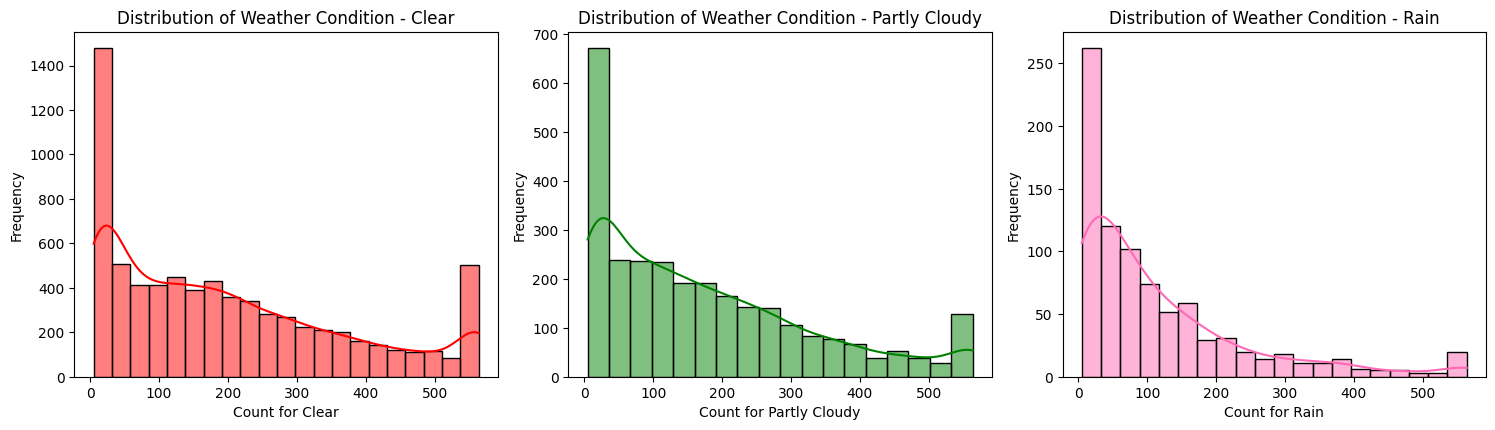

In [45]:
weather_conditions = df_new['weather'].unique()

num = len(weather_conditions)
rows, cols = (num // 2) + (num % 2 > 0), 4  # Ensures all are plotted

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 5, rows * 4))

# fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 5 * rows))
axes = axes.flatten()  # Flatten in case of single row/column layout

# Colors for each category
colors = ['red', 'green', 'hotpink', 'orange', 'blue', 'purple']

# Plot histograms
for ax, condition, color in zip(axes, weather_conditions, colors):
    sns.histplot(df[df['weather'] == condition]['count'], ax=ax, kde=True, color=color)
    ax.set_title(f"Distribution of Weather Condition - {condition}")
    ax.set_xlabel(f"Count for {condition}")
    ax.set_ylabel("Frequency")

# Remove extra empty subplots if any
for i in range(num, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


📊 **Shapiro-Wilk Normality Test Results**

🔹 **Clear** → P-value: 0.00000
   ❌ **Reject H₀**: Data is NOT normally distributed.
--------------------------------------------------
🔹 **Partly Cloudy** → P-value: 0.00000
   ❌ **Reject H₀**: Data is NOT normally distributed.
--------------------------------------------------
🔹 **Rain** → P-value: 0.00000
   ❌ **Reject H₀**: Data is NOT normally distributed.
--------------------------------------------------


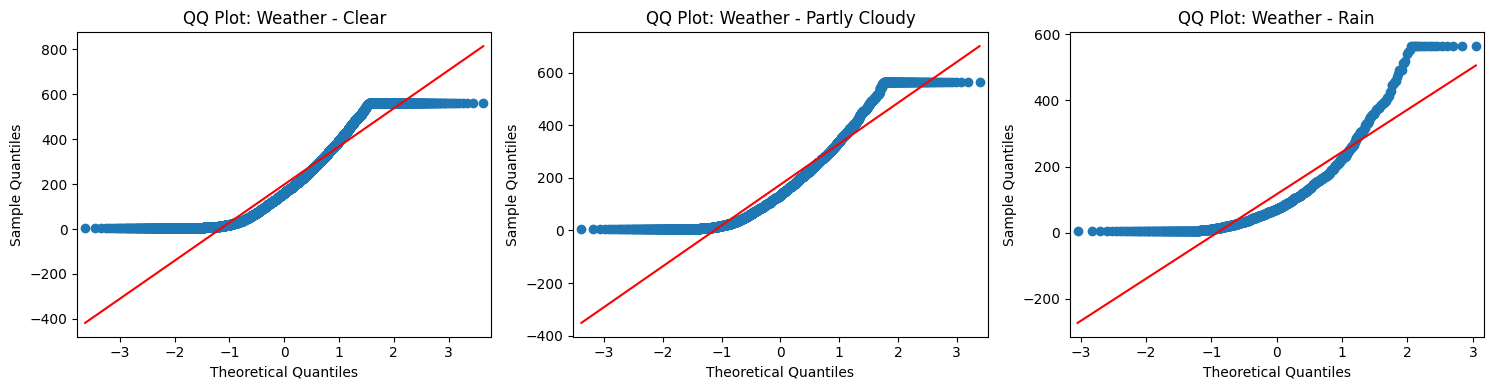

In [46]:
qq_shapiro_test(df_new, 'weather')

#### Equality of variance

In [47]:
weather_data = levene_test(df_new, "weather")


Levene’s Test: weather vs. count
🔹 P-value: 0.00000
   ❌ **Reject H₀**: Variances are NOT equal.
--------------------------------------------------


In [ ]:
levene?

P - Value is less than 0.05 suggests that variance is not equal accross weather conditions.

### Calculate the Test Statistics and p-value

Since both the normality test and Levene’s test for equal variance have failed, parametric tests like ANOVA are no longer valid. Instead, prodeeded with **`Kruskal-Wallis`** test for multiple-group comparisons.

However, for completeness, both parametric and non-parametric tests have been performed below—compare the results accordingly."

In [48]:
from scipy.stats import f_oneway

# no need to mention alternative as we are doing two-tailed test (not equal)
statistic, p_value = f_oneway(*weather_data)

print(f"Test Statistic : {statistic}", end = "\n")
print(f"p - value : {p_value}")

if p_value < 0.05:
  print(" Reject the Null Hypothesis (Ho), The average no. of bike rides in different weather conditions are not equal.")
else:
  print("Failed to Reject the Null Hypothesis (Ho), The average no. of bike rides in different weather conditions are equal.")

Test Statistic : 105.25126742539126
p - value : 5.326540581296025e-46
 Reject the Null Hypothesis (Ho), The average no. of bike rides in different weather conditions are not equal.


In [49]:

from scipy.stats import kruskal

statistic,p_value = kruskal(*weather_data)
print(f"Test Statistic : {statistic}", end = "\n")
print(f"p - value : {p_value}")

if p_value < 0.05:
  print(" Reject the Null Hypothesis (Ho), The average no. of bike rides in different weather conditions are not equal.")
else:
  print("Failed to Reject the Null Hypothesis (Ho), The average no. of bike rides in different weather conditions are equal.")

Test Statistic : 204.73889687823703
p - value : 3.479472652318814e-45
 Reject the Null Hypothesis (Ho), The average no. of bike rides in different weather conditions are not equal.


- Keeping the weather condition in perspective need to maintain enough bikes ready based on respective seasons demand.
- Promote the rides by offfering different discounts to keep the rides increasing
- Provide users with safety tips and guidelines tailored to different weather conditions.

## No. of Bike Rides vs Seasons



In [50]:
df['season'].value_counts()

,count
season,
Winter,2734
Summer,2733
Fall,2733
Spring,2686


### Formulating Null(Ho) and Alternate (Ha) Hypothesis

**Null Hypothesis (Ho)** - There is no difference between the count of bike rides across different seasons.

**Alternate Hypothesis (Ha)** - There is significant difference between the count of bike rides across different seasons.

### Selecting the Test

- We can use **One Way ANOVA Test** here as we are comparing a Numerical vs Categorical(more than 2 categories)

### Validating the ANOVA Test Assumptions

#### Normality

In [ ]:
seasons = df['season'].unique()

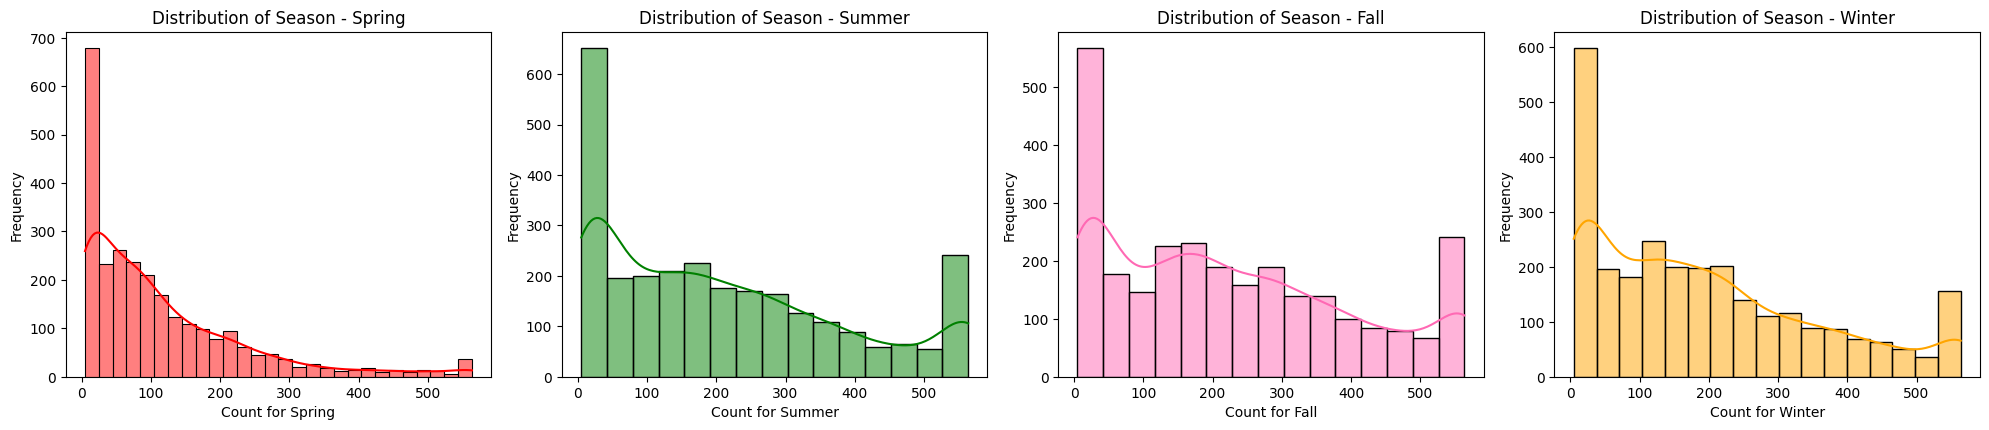

In [52]:
season_type = df_new['season'].unique()

num = len(season_type)
rows, cols = (num // 2) + (num % 2 > 0), 4  # Ensures all are plotted

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 5, rows * 4))

# fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 5 * rows))
axes = axes.flatten()  # Flatten in case of single row/column layout

# Colors for each category
colors = ['red', 'green', 'hotpink', 'orange', 'blue', 'purple']

# Plot histograms
for ax, condition, color in zip(axes, season_type, colors):
    sns.histplot(df[df['season'] == condition]['count'], ax=ax, kde=True, color=color)
    ax.set_title(f"Distribution of Season - {condition}")
    ax.set_xlabel(f"Count for {condition}")
    ax.set_ylabel("Frequency")

# Remove extra empty subplots if any
for i in range(num, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


📊 **Shapiro-Wilk Normality Test Results**

🔹 **Spring** → P-value: 0.00000
   ❌ **Reject H₀**: Data is NOT normally distributed.
--------------------------------------------------
🔹 **Summer** → P-value: 0.00000
   ❌ **Reject H₀**: Data is NOT normally distributed.
--------------------------------------------------
🔹 **Fall** → P-value: 0.00000
   ❌ **Reject H₀**: Data is NOT normally distributed.
--------------------------------------------------
🔹 **Winter** → P-value: 0.00000
   ❌ **Reject H₀**: Data is NOT normally distributed.
--------------------------------------------------


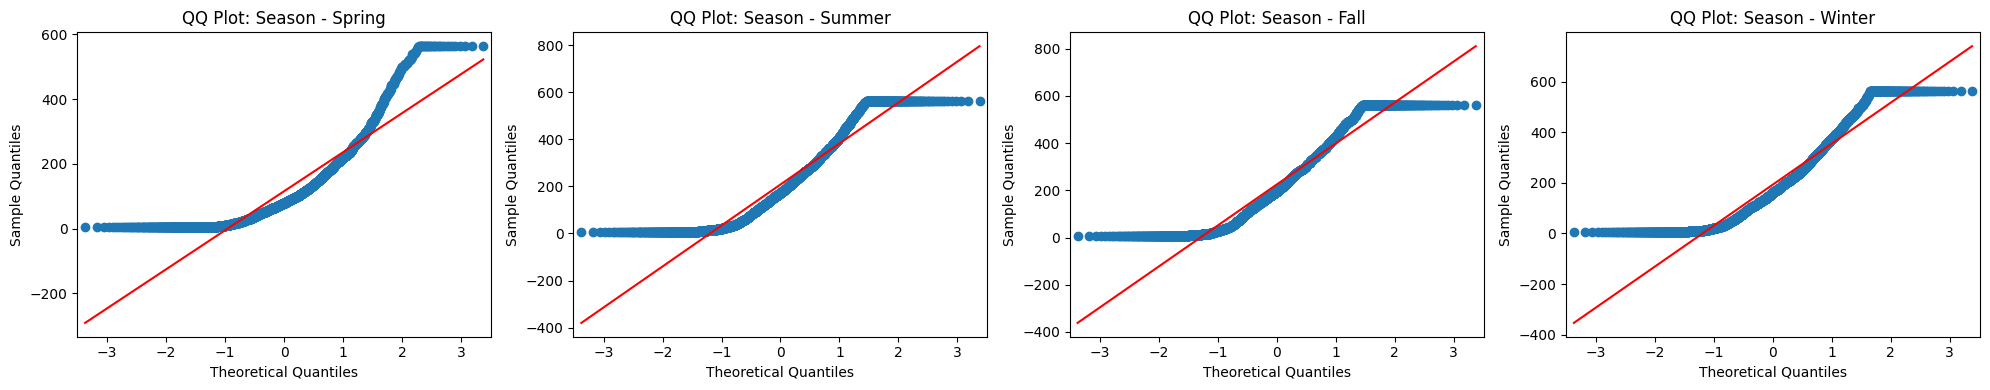

In [53]:
qq_shapiro_test(df, groupby = 'season')

Here p_value for all the weather conditions with enough data is less than 0.05 (alpha), it indicates that data distribution differs from normal distribution

#### Equality of variance

In [54]:
# Levenes Test
from scipy.stats import levene

# season_data = [df[df['season'] == i]['count'] for i in seasons]
season_data = levene_test(df, "season")


Levene’s Test: season vs. count
🔹 P-value: 0.00000
   ❌ **Reject H₀**: Variances are NOT equal.
--------------------------------------------------


P - Value is less than 0.05 suggests that variance is not equal accross weather conditions.

### Calculate the Test Statistics and p-value

Since both the normality test and Levene’s test for equal variance have failed, parametric tests like ANOVA are no longer valid. Instead, prodeeded with **`Kruskal-Wallis`** test for multiple-group comparisons.

However, for completeness, both parametric and non-parametric tests have been performed below—compare the results accordingly."

In [55]:
from scipy.stats import kruskal

statistic, p_value = kruskal(*season_data)

print(f"Test Statistic : {statistic}", end = "\n")
print(f"p - value : {p_value}")

if p_value < 0.05:
  print(" Reject the Null Hypothesis (Ho), there is signififcant difference between the count of bike rides across different seasons")
else:
  print("Failed to Reject the Null Hypothesis (Ho), there is no significant difference between the count of bike rides across different seasons")


Test Statistic : 690.4515233888959
p - value : 2.4688288437668016e-149
 Reject the Null Hypothesis (Ho), there is signififcant difference between the count of bike rides across different seasons


In [56]:
from scipy.stats import f_oneway

# no need to mention alternative as we are doing two-tailed test (not equal)
statistic, p_value = f_oneway(*season_data)

print(f"Test Statistic : {statistic}", end = "\n")
print(f"p - value : {p_value}")

if p_value <= 0.05:
  print(" Reject the Null Hypothesis (Ho), there is signififcant difference between the count of bike rides across different seasons")
else:
  print("Failed to Reject the Null Hypothesis (Ho), there is no significant difference between the count of bike rides across different seasons")

Test Statistic : 247.72532786423764
p - value : 1.648284086756556e-155
 Reject the Null Hypothesis (Ho), there is signififcant difference between the count of bike rides across different seasons


- Offer discounts or promotions during seasons with lower ridership to increase usage.
- Engage with customers with seasonal events and safety campaigns to ensure consistent riding

## Weather Conditions vs Seasons



### Formulating Null(Ho) and Alternate (Ha) Hypothesis

**Null Hypothesis (Ho)** - There is no significant difference in weather conditions across different seasons.

**Alternate Hypothesis (Ha)** - There is significant difference in weather conditions across different seasons.

### Selecting the Test

- We can use **Chisquared Test for Independence** here as we need to find whether there was any relation between two categorical variables.

### Calculate the Test Statistics and p-value

In [57]:
# cross tab between season and weather
data = pd.crosstab(df['season'], df['weather'])
data

weather,Clear,Partly Cloudy,Rain,Heavy Rain
season,,,,
Spring,1759,715,211,1
Summer,1801,708,224,0
Fall,1930,604,199,0
Winter,1702,807,225,0


In [58]:
from scipy.stats import chi2_contingency

# no need to mention alternative as we are doing two-tailed test (not equal)
statistic, p_value, dof, exp_table = chi2_contingency(data)

print(f"Test Statistic : {statistic}", end = "\n")
print(f"p - value : {p_value}", end ='\n')
print(f"Degree of Freedom : {dof}", end ='\n')
# print(f"Expected Table : {exp_table}")

if p_value <= 0.05:
  print("Reject the Null Hypothesis (Ho)")
  print("There is signififcant difference in weather conditions across different seasons")
else:
  print("Failed to Reject the Null Hypothesis (Ho)")
  print("There is no significant difference in weather conditions across different seasons")

Test Statistic : 49.158655596893624
p - value : 1.549925073686492e-07
Degree of Freedom : 9
Reject the Null Hypothesis (Ho)
There is signififcant difference in weather conditions across different seasons


- The significant differences in weather conditions across seasons should be considered in planning activities, resource allocation, and forecasting.